In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

# Read Data

In [ ]:
df = pd.read_csv(r"data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# EDA

## Summary Stats

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.drop_duplicates().shape[0]

1000

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe().round(2)

,math_score,reading_score,writing_score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [ ]:
print("gender distribution")
print(df["gender"].value_counts())

print("\nrace_ethnicity distribution")
print(df["race_ethnicity"].value_counts())

print("\nparental_level_of_education distribution")
print(df["parental_level_of_education"].value_counts())

print("\nlunch distribution")
print(df["lunch"].value_counts())

print("\ntest preparation course distribution")
print(df["test_preparation_course"].value_counts())

gender distribution
gender
female    518
male      482
Name: count, dtype: int64

race_ethnicity distribution
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education distribution
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch distribution
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course distribution
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


## Relationships & Distributions

In [ ]:
numeric_features = ["math_score", "reading_score", "writing_score"]
categorical_features = [
    "gender",
    "race_ethnicity",
    "parental_level_of_education",
    "lunch",
    "test_preparation_course",
]

In [ ]:
df["total_score"] = df[numeric_features].sum(axis=1)
df["average_score"] = df[numeric_features].mean(axis=1).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


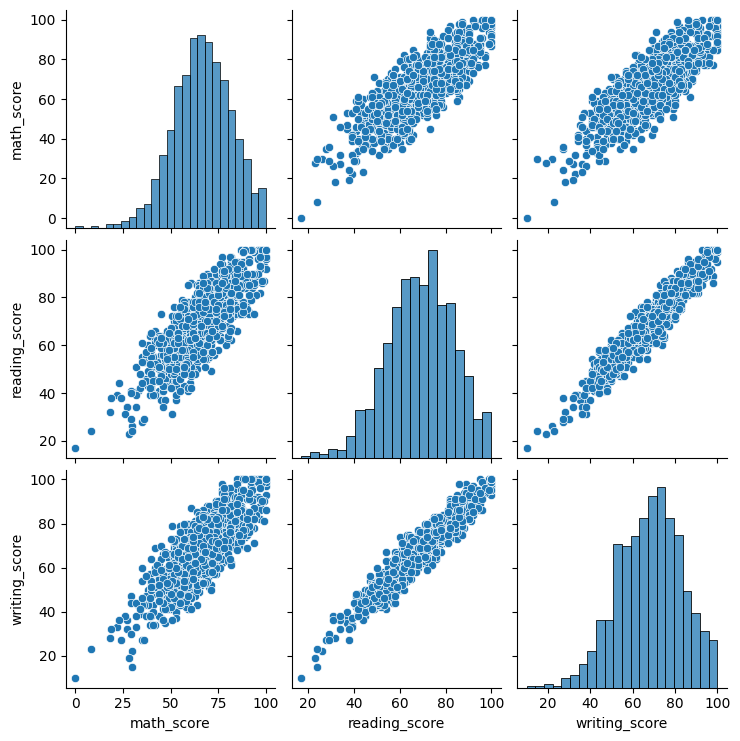

In [40]:
sns.pairplot(df[numeric_features])
plt.show()

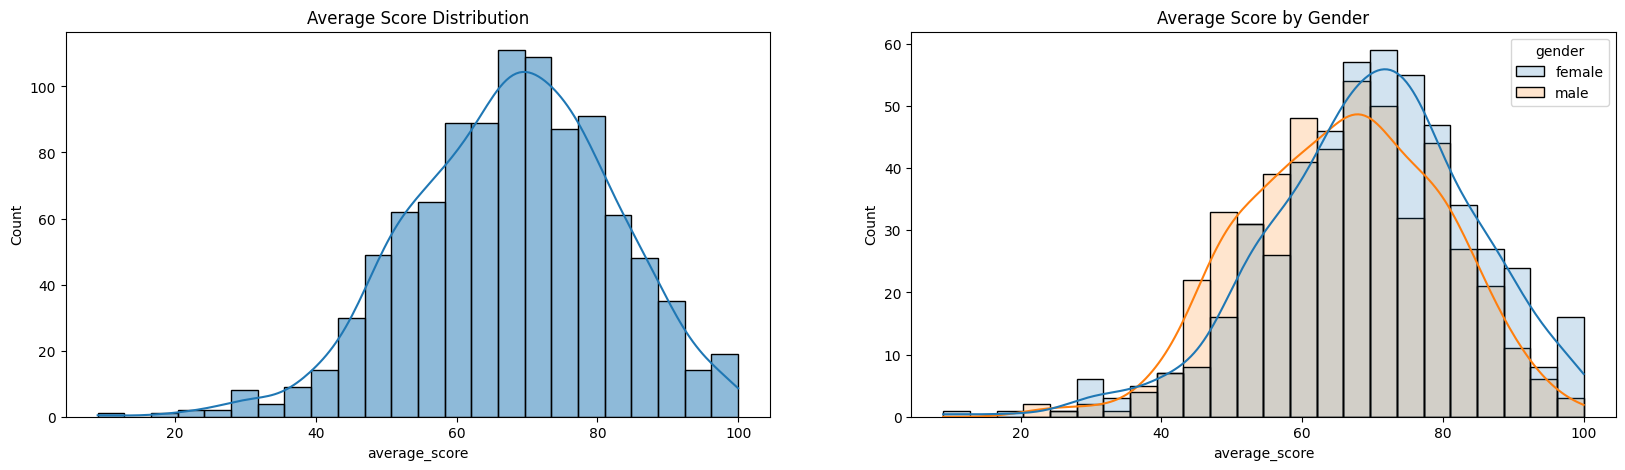

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="average_score", kde=True)
plt.title("Average Score Distribution")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="average_score", hue="gender", kde=True, alpha=0.2)
plt.title("Average Score by Gender")
plt.show()

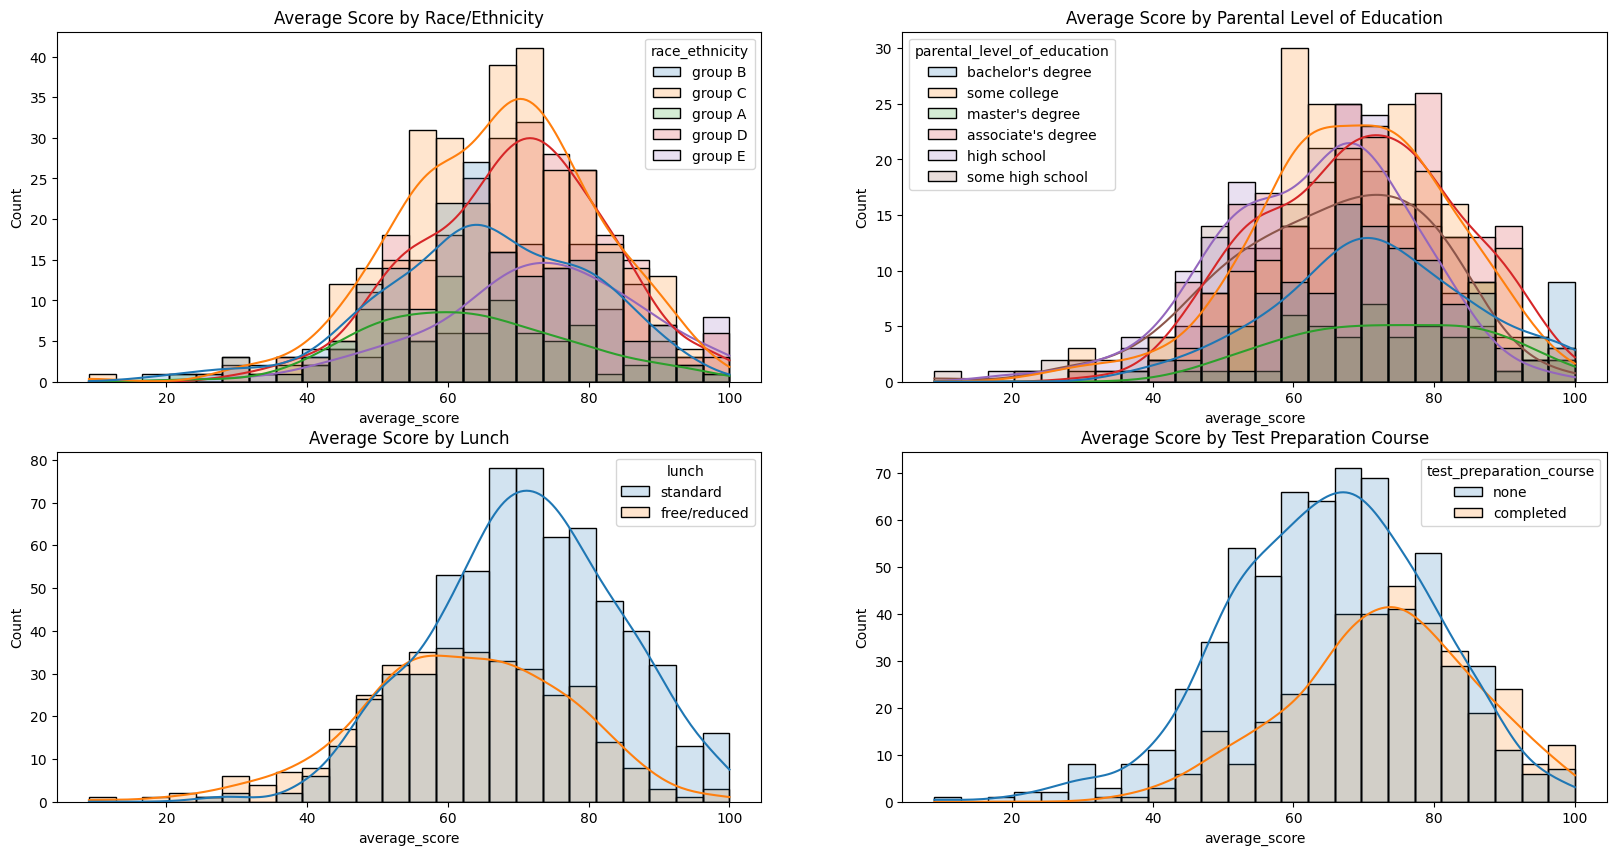

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(
    data=df, x="average_score", hue="race_ethnicity", kde=True, alpha=0.2, ax=axs[0, 0]
)
axs[0, 0].set_title("Average Score by Race/Ethnicity")
sns.histplot(
    data=df,
    x="average_score",
    hue="parental_level_of_education",
    kde=True,
    alpha=0.2,
    ax=axs[0, 1],
)
axs[0, 1].set_title("Average Score by Parental Level of Education")
sns.histplot(data=df, x="average_score", hue="lunch", kde=True, alpha=0.2, ax=axs[1, 0])
axs[1, 0].set_title("Average Score by Lunch")
sns.histplot(
    data=df,
    x="average_score",
    hue="test_preparation_course",
    kde=True,
    alpha=0.2,
    ax=axs[1, 1],
)
axs[1, 1].set_title("Average Score by Test Preparation Course")
plt.show()

In [42]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')